# An analysis of several car brands over 10 years 🚗

Various car brands like Tesla, Ford, General Motors will be analyzed to get a general idea of the car market for the past 10 years.

#### Importing libraries and preparing the environment

In [52]:
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import datetime
import yfinance as yfin
import matplotlib.pyplot as plt
yfin.pdr_override()
%matplotlib inline
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

#### Reading the stock data and plotting

In [4]:
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2023,1,1)

In [5]:
#downloading the data through Yahoo! Finance
tesla = yfin.download('TSLA', start, end)
ford = yfin.download('F',start,end)
gm = yfin.download('GM',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
#downloading the data locally as .csv file
tesla.to_csv('Tesla_Stock.csv')
ford.to_csv('Ford_Stock.csv')
gm.to_csv('GM_Stock.csv') 

In [7]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [8]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,13.23,13.28,13.00,13.20,8.262148,75274700
2013-01-03,13.24,13.70,13.05,13.46,8.424890,121284700
2013-01-04,13.51,13.61,13.35,13.57,8.493738,54669900
2013-01-07,13.52,13.58,13.35,13.43,8.406109,43482400
2013-01-08,13.38,13.43,13.20,13.35,8.356036,46336200


In [9]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,29.410000,29.500000,28.629999,29.129999,22.361166,15605900
2013-01-03,29.049999,30.230000,28.840000,29.820000,22.890833,22903800
2013-01-04,29.740000,29.860001,29.230000,29.860001,22.921535,8066600
2013-01-07,29.639999,29.860001,29.299999,29.660000,22.768011,8385300
2013-01-08,29.660000,29.850000,29.049999,29.370001,22.545399,10435200


##### Stock Prices

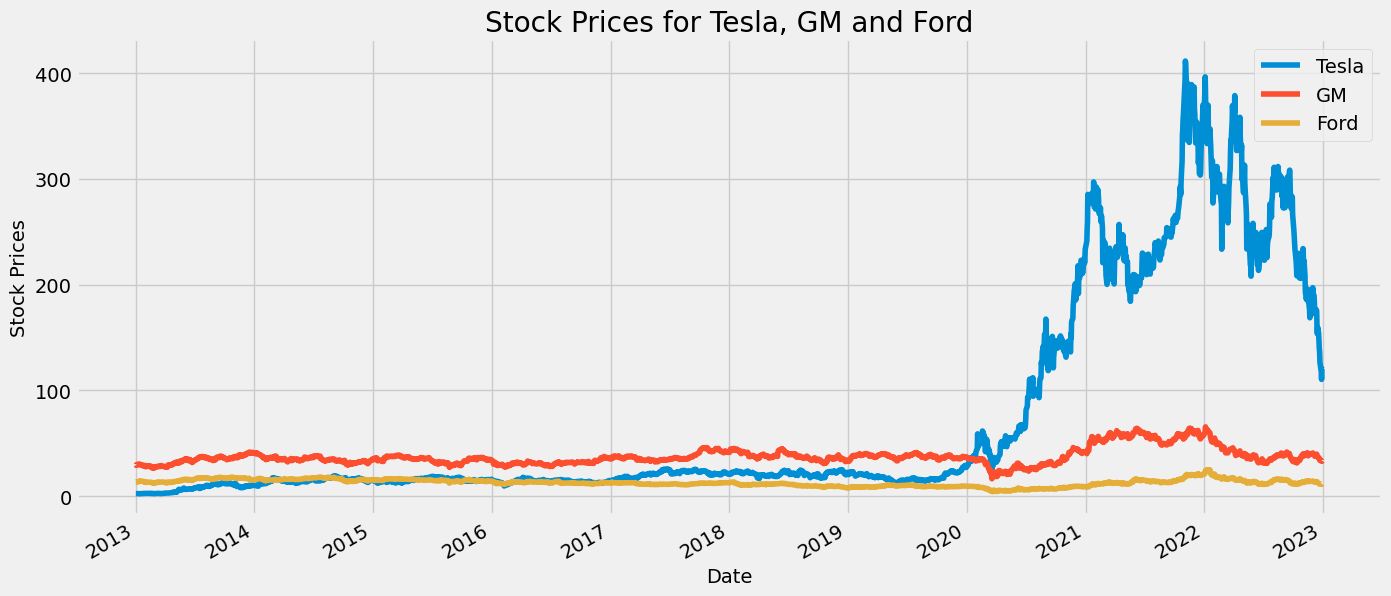

In [10]:
tesla['Open'].plot(label='Tesla',figsize=(15,7))
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')

plt.title('Stock Prices for Tesla, GM and Ford')
plt.ylabel('Stock Prices')
plt.legend()

##### Volume Traded

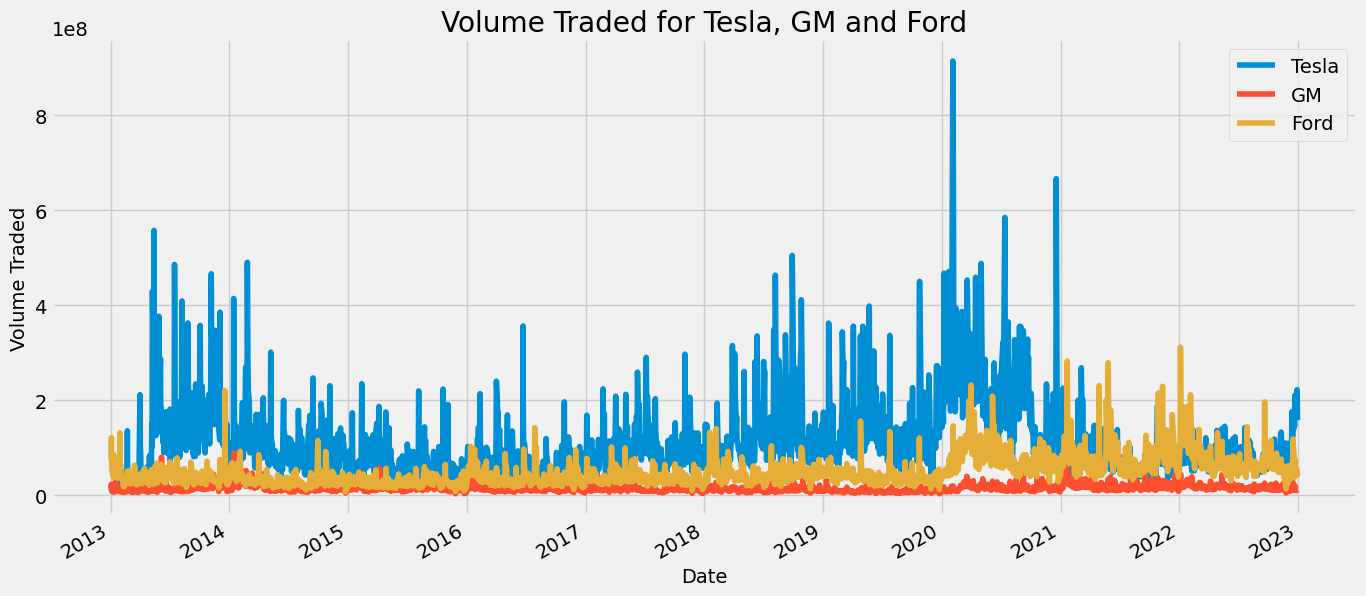

In [11]:
#volume traded comparison

tesla['Volume'].plot(label='Tesla',figsize=(15,7))
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')

plt.title('Volume Traded for Tesla, GM and Ford')
plt.ylabel('Volume Traded')
plt.legend()

In [12]:
#to check the max volume tradedd for ford
ford.iloc[[ford['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,22.52,24.559999,22.42,24.309999,22.146315,311645200


4th of January, 2022 was the date where Ford had the most volumes traded in a single day. To find a reason why, I will google this date (2022-01-04) with Ford attached to it.
According to [this Reuters article](https://www.reuters.com/technology/ford-doubles-lightning-production-electric-truck-battle-with-gm-heats-up-2022-01-04/), we can see that the reason is the news of Ford manufacturing electric trucks was received well. Opening prices for Ford around 4th of January, 2022 can be seen in the below plot.

<Axes: xlabel='Date'>

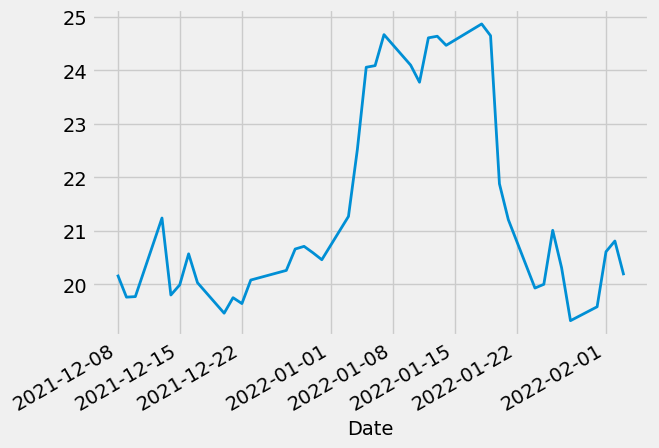

In [13]:
ford.iloc[2250:2290]['Open'].plot(lw=2)

##### Market Capitalization

Shortened market cap is the total value traded for a company. Currently the data does not have a column to analyze it however a column name 'Total Traded' can easily be created by multiplying the 'Open' column and the 'Volume' column to get an idea of the market cap.

In [14]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']

In [15]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000,4.181799e+07
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000,2.610356e+07
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000,2.345520e+07
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000,1.538160e+07
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000,4.429800e+07


In [16]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2013-01-02,29.410000,29.500000,28.629999,29.129999,22.361166,15605900,4.589695e+08
2013-01-03,29.049999,30.230000,28.840000,29.820000,22.890833,22903800,6.653554e+08
2013-01-04,29.740000,29.860001,29.230000,29.860001,22.921535,8066600,2.399007e+08
2013-01-07,29.639999,29.860001,29.299999,29.660000,22.768011,8385300,2.485403e+08
2013-01-08,29.660000,29.850000,29.049999,29.370001,22.545399,10435200,3.095080e+08


In [17]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2013-01-02,13.23,13.28,13.00,13.20,8.262148,75274700,9.958842e+08
2013-01-03,13.24,13.70,13.05,13.46,8.424890,121284700,1.605809e+09
2013-01-04,13.51,13.61,13.35,13.57,8.493738,54669900,7.385904e+08
2013-01-07,13.52,13.58,13.35,13.43,8.406109,43482400,5.878821e+08
2013-01-08,13.38,13.43,13.20,13.35,8.356036,46336200,6.199784e+08


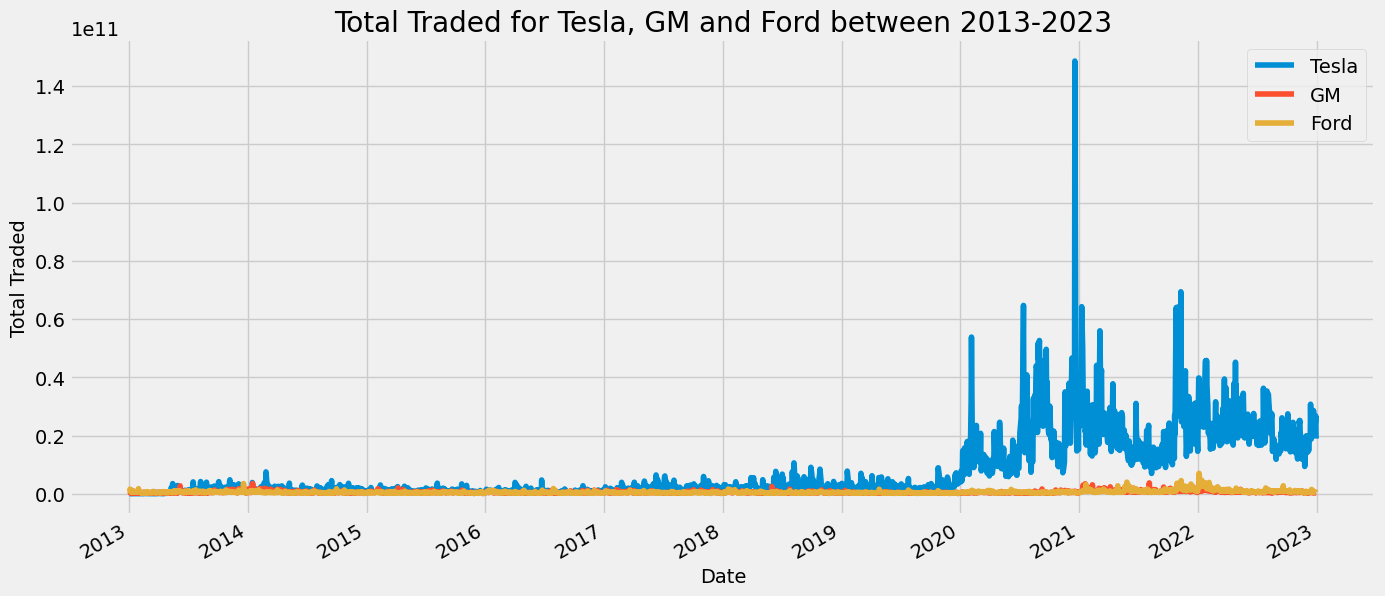

In [22]:
tesla['Total Traded'].plot(label='Tesla',figsize=(15,7))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')

plt.title('Total Traded for Tesla, GM and Ford between 2013-2023')
plt.ylabel('Total Traded')
plt.legend()

In [23]:
tesla['Total Traded'].argmax()

2006

In [24]:
tesla.iloc[[tesla['Total Traded'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2020-12-18,222.96666,231.666672,209.513336,231.666672,231.666672,666378600,1.485802e+11


https://www.forbes.com/sites/jonathanponciano/2020/12/18/tesla-historic-sp-500-debut-sparks-big-trading-volume-as-investors-buy-over-80-billion-in-shares/?sh=4819e5a52e8b

##### Moving Averages

To get rid of the noise in small ranges.

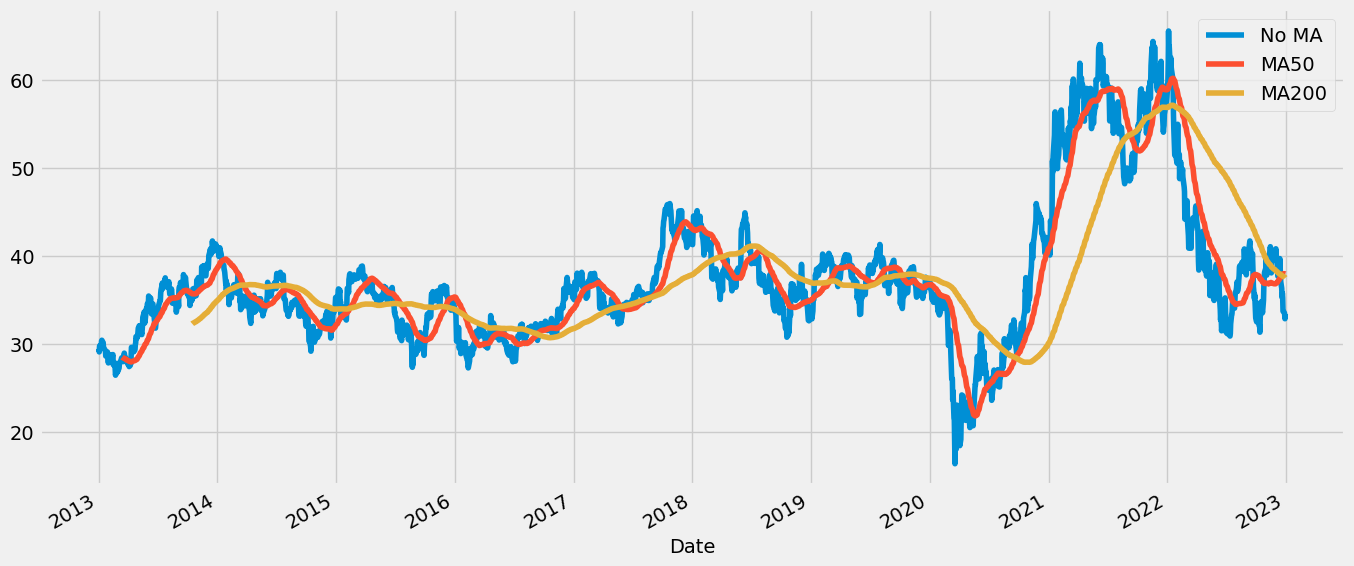

In [30]:
gm['Open'].plot(label= 'No MA',figsize=(15,7))
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA50'].plot(label='MA50')
gm['MA200'] = gm['Open'].rolling(200).mean()
gm['MA200'].plot(label='MA200')

plt.legend()

##### Correlation between stocks

Since all three companies are car focused, there should be some correlation between their stock prices. 

In [35]:
from pandas.plotting import scatter_matrix

In [46]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='GM Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='GM Open'>,
        <Axes: xlabel='GM Open', ylabel='GM Open'>,
        <Axes: xlabel='Ford Open', ylabel='GM Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Ford Open'>,
        <Axes: xlabel='GM Open', ylabel='Ford Open'>,
        <Axes: xlabel='Ford Open', ylabel='Ford Open'>]], dtype=object)

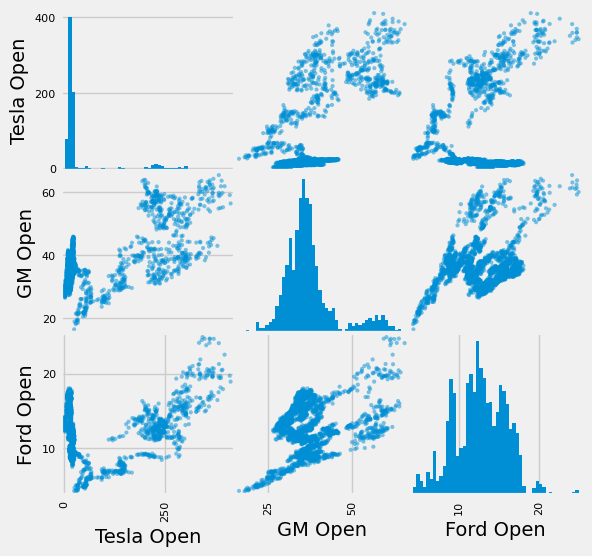

In [56]:
scatter_matrix(car_comp,figsize=(6,6),hist_kwds={'bins':50})

Based on the above figure, there is an obvious relation between all three car companies in the recent years, however this has not always been the case. Especially between Tesla and the other two companies there was no relation at the start of the 10 year. 

The opposite is true for GM and Ford, these two companies had a clear positive correlation at the start of the 10 year, which then wasn't so clear after.